In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
### 1.1 Load the Dataset

In [2]:
raw_data = pd.read_csv('customer_segmentation_dataset.csv')

In [3]:
# Display the first few rows
raw_data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1500 non-null   float64
 1   AnnualIncome       1500 non-null   float64
 2   SpendingScore      1500 non-null   float64
 3   PurchaseFrequency  1500 non-null   float64
 4   AverageBasketSize  1500 non-null   float64
 5   LoyaltyPoints      1500 non-null   float64
 6   PreferredCategory  1500 non-null   object 
 7   CustomerID         1500 non-null   int64  
 8   Gender             1500 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 105.6+ KB


In [5]:
raw_data.describe()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,CustomerID
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,37.280831,67264.892504,67.323610,6.379343,120.209451,1615.478800,750.500000
std,10.261314,34264.393922,23.568888,4.016314,71.351200,1480.107927,433.157015
min,10.578378,16576.059764,20.013068,1.000061,2.777223,0.298969,1.000000
25%,29.805078,37344.859024,55.056564,2.998994,52.789230,499.107283,375.750000
50%,37.500455,58596.040847,74.839231,5.493192,116.193326,1000.518510,750.500000
75%,44.797507,93588.656419,84.404828,8.504391,169.635239,2249.961077,1125.250000
max,64.073272,150788.808085,99.958682,14.997069,359.655378,4995.641711,1500.000000


#### Create a copy of the data for processing and model training
Keeping the raw data for assessment later.

In [6]:
data = raw_data.copy()

In [7]:
data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female


### 1.2 Handle Missing Values
Impute missing values using the median for numerical features.

In [8]:
# Check for missing values
data.isnull().sum()

Age                  0
AnnualIncome         0
SpendingScore        0
PurchaseFrequency    0
AverageBasketSize    0
LoyaltyPoints        0
PreferredCategory    0
CustomerID           0
Gender               0
dtype: int64

#### Remove Irrelevant Columns

In [9]:
data.drop(["CustomerID","LoyaltyPoints"], axis=1, inplace=True)

### 1.3 Encode Categorical Variables
Convert Gender and PreferredCategory into numerical representations.

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['PreferredCategory'] = label_encoder.fit_transform(data['PreferredCategory'])

In [12]:
# Display transformed dataset
data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,52.704543,60215.004541,71.054078,5.156217,100.408343,0,0
1,21.918173,49322.316537,70.683512,3.507173,88.413767,3,1
2,34.672262,25647.414471,34.832829,1.270919,27.656651,2,1
3,31.112305,30079.037721,37.244059,1.200491,29.166199,2,1
4,36.825627,32691.620112,25.714151,1.448637,24.518336,2,0


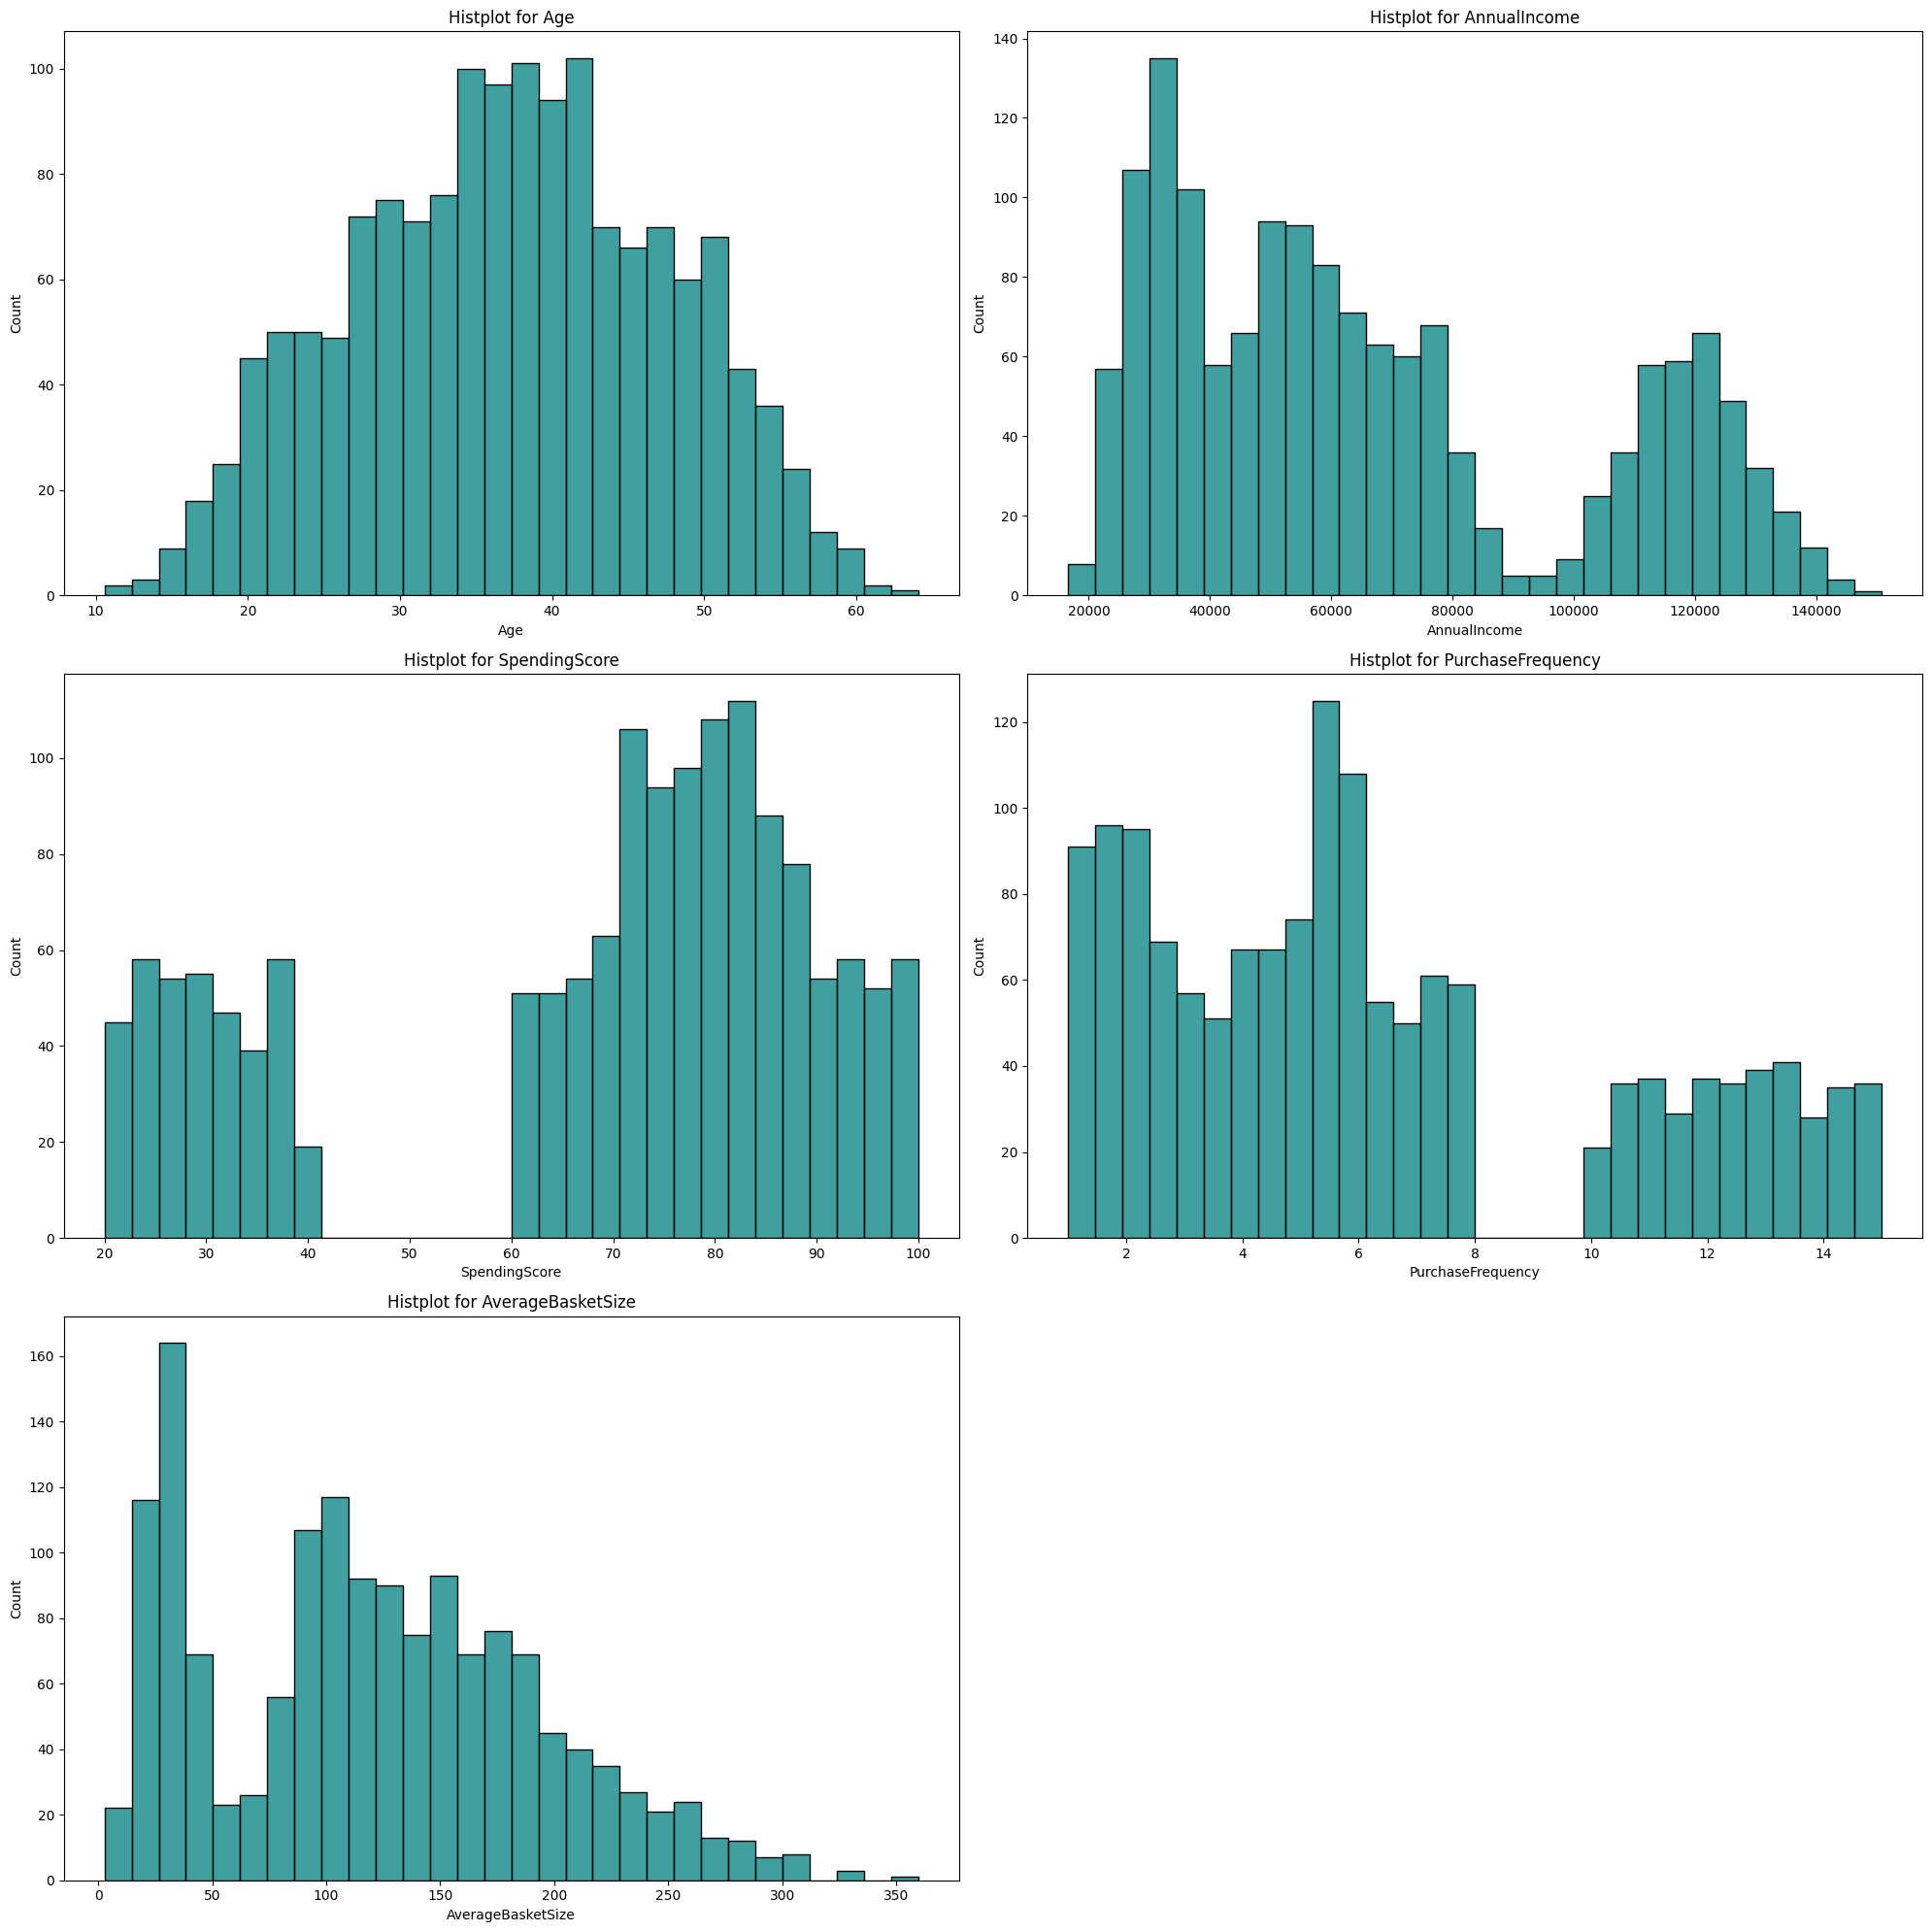

In [13]:
# numerical_columns = data.select_dtypes(include="number").columns
num_col = ["Age",	"AnnualIncome", "SpendingScore", "PurchaseFrequency", "AverageBasketSize"]
# fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
# ax=ax.flatten()
plt.figure(figsize=(20, 20))
for idx, col in enumerate(num_col, 1):
    plt.subplot(3,2,idx)
    sns.histplot(data[col], bins=30, color="teal")
    # ax[idx].set_title(f"Histplot for {col}")
    plt.title(f"Histplot for {col}")
plt.tight_layout()
plt.show()

### 1.4 Feature Scaling
Scale numerical features for clustering.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# List of features to scale
features_to_scale = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 
                     'AverageBasketSize']

In [16]:
# Apply StandardScaler
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# 2. Clustering
### 2.1 Determine Optimal Number of Clusters
Use the Elbow Method or Silhouette Score to decide the number of clusters.

In [17]:
from sklearn.cluster import KMeans
import numpy as np

#### Elbow Method

In [18]:
# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

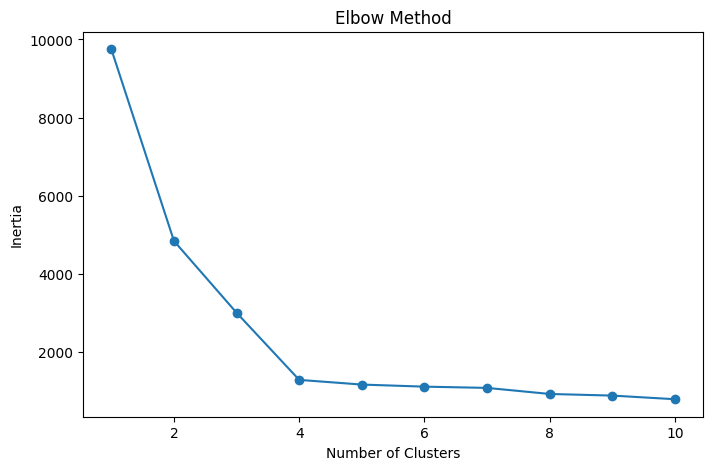

In [19]:
# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

#### Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
# Compute silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

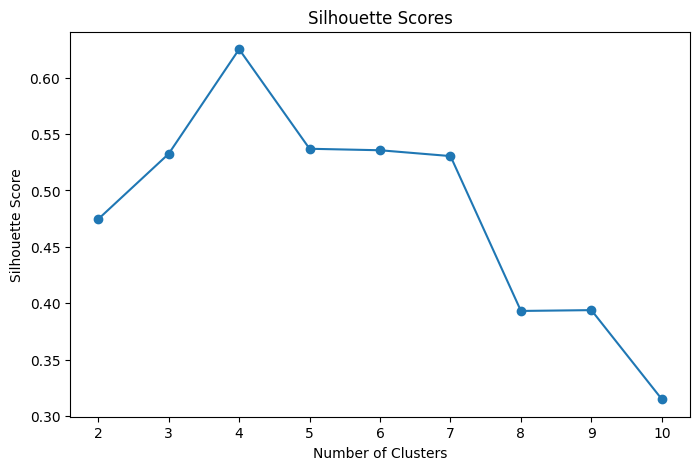

In [22]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


### 2.2 Apply K-Means Clustering
The optimal number of clusters is 4 (based on the above analysis).

In [23]:
# Apply K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [24]:
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

#### We will revert to using the raw data for assessment of the model

In [25]:
raw_data['Cluster'] = kmeans.labels_

In [26]:
raw_data.head()

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,LoyaltyPoints,PreferredCategory,CustomerID,Gender,Cluster
0,52.704543,60215.004541,71.054078,5.156217,100.408343,1357.513328,Clothing,1117,Female,3
1,21.918173,49322.316537,70.683512,3.507173,88.413767,659.809063,Luxury,1369,Male,2
2,34.672262,25647.414471,34.832829,1.270919,27.656651,61.248931,Groceries,423,Male,1
3,31.112305,30079.037721,37.244059,1.200491,29.166199,165.077975,Groceries,414,Male,1
4,36.825627,32691.620112,25.714151,1.448637,24.518336,83.783270,Groceries,452,Female,1


# 3. Model Interpretation
Lets visualize relationships between key variables and the different clusters to interprete the model. Here we will use the `raw data` for visualizing the real properties.

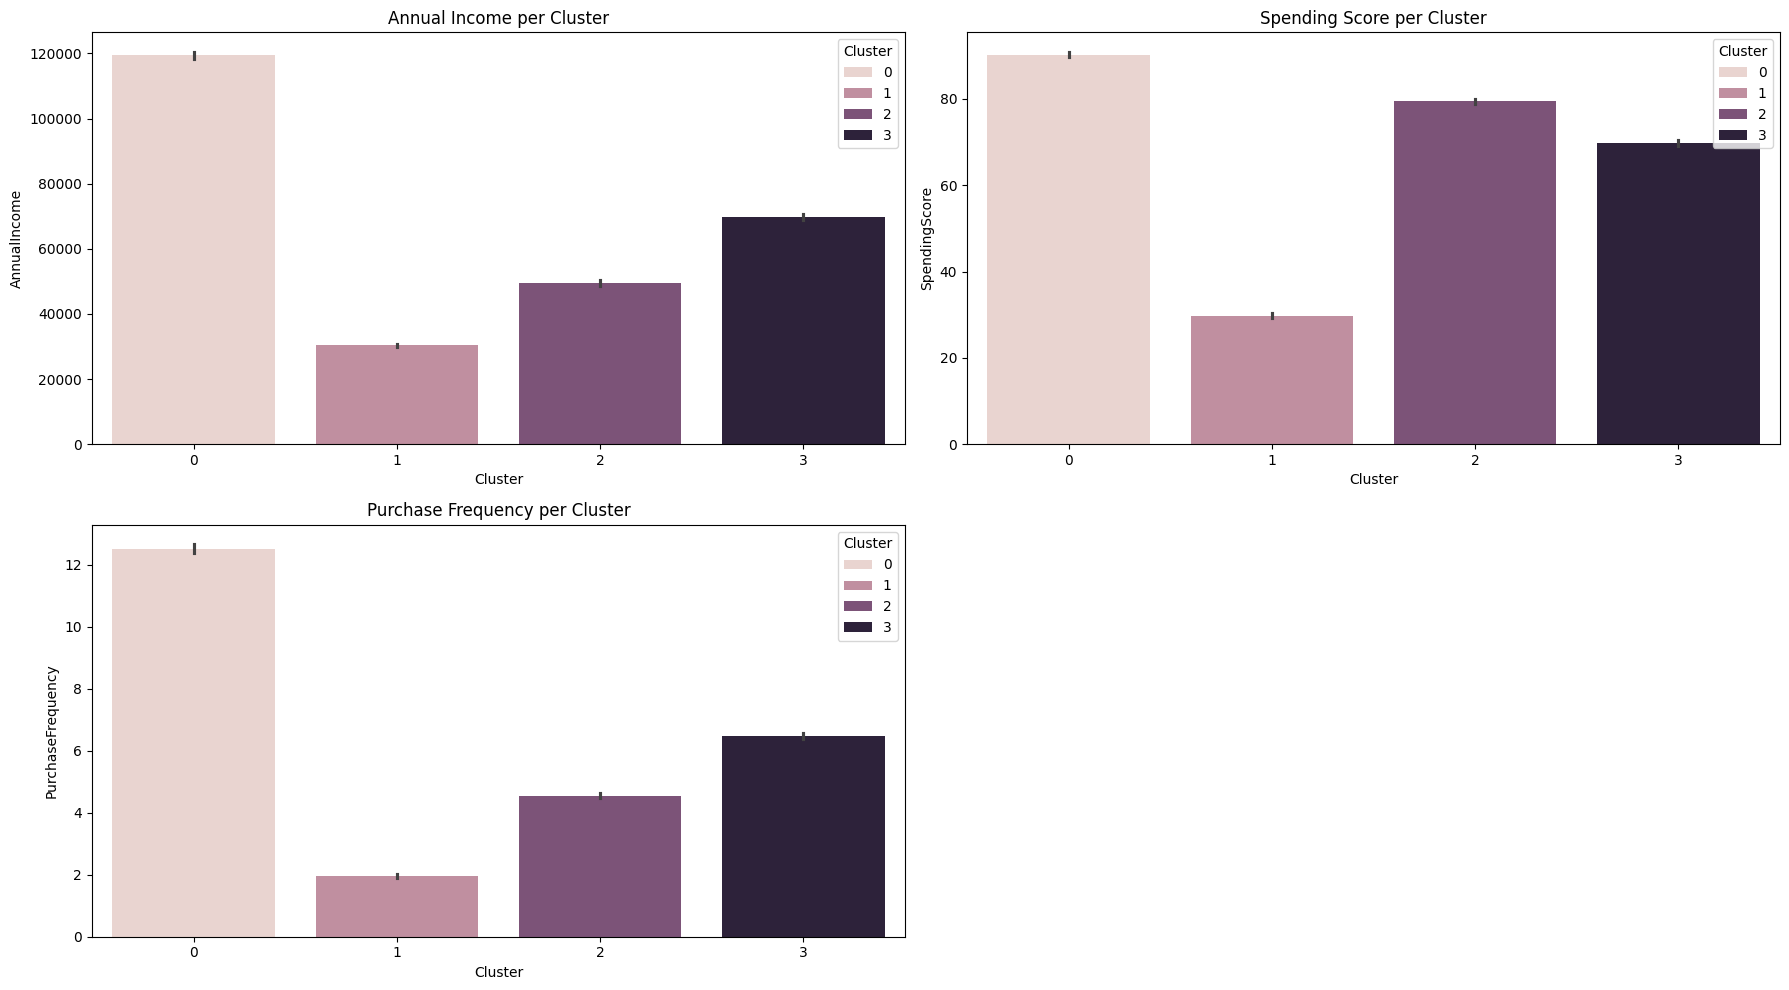

In [53]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.barplot(x='Cluster', y='AnnualIncome', hue="Cluster", data=raw_data) 
plt.title('Annual Income per Cluster')

plt.subplot(2,2,2)
sns.barplot(x='Cluster', y='SpendingScore', hue="Cluster", data=raw_data)
plt.title('Spending Score per Cluster')

plt.subplot(2,2,3)
sns.barplot(x='Cluster', y='PurchaseFrequency',hue="Cluster",  data=raw_data)
plt.title('Purchase Frequency per Cluster')

plt.tight_layout()
plt.show()

### Business Insights

**Cluster Profiles:**
- Cluster 0: High-income, high-spending frequent buyers (likely premium customers).
- Cluster 1: Low-income, low-spending infrequent buyers (price-sensitive customers).
- Cluster 2: Young, high-spending occasional buyers (luxury-oriented shoppers).
- Cluster 3: Mid-income, moderate-spending regular buyers (consistent shoppers).

# DEMO: Real-Time Usage of Clustering System

In [32]:
import pickle

# Load dataset
data = pd.read_csv('customer_segmentation_dataset.csv')

# Encode categorical variables using LabelEncoder
label_encoders = {}  # Dictionary to store encoders for reuse

categorical_columns = ['PreferredCategory', 'Gender']
for column_name in categorical_columns:
    le = LabelEncoder()
    data[column_name] = le.fit_transform(data[column_name])
    label_encoders[column_name] = le  # Save the encoder for later use

# Remove irrelevant features
data.drop(columns=['CustomerID', 'LoyaltyPoints'], inplace=True)


# Scale numerical features using MinMaxScaler
scaler = StandardScaler()
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'AverageBasketSize']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Train the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Save the trained model, scaler, and encoders
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoders.pkl', 'wb') as encoders_file:
    pickle.dump(label_encoders, encoders_file)

print("Training completed. Model, scaler, and encoders saved.")


Training completed. Model, scaler, and encoders saved.


## Runtime Code

In [33]:
# Load the saved model, scaler, and encoders
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoders.pkl', 'rb') as encoders_file:
    label_encoders = pickle.load(encoders_file)

In [34]:
# Example new customer input
new_customer = {
    'Age': 30,
    'AnnualIncome': 60000,
    'SpendingScore': 75,
    'PurchaseFrequency': 4,
    'AverageBasketSize': 120,
    'PreferredCategory': 'Luxury',
    'Gender': 'Male'
}


In [35]:
# Convert the new customer input into a DataFrame
new_customer_df = pd.DataFrame([new_customer])

In [36]:
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,30,60000,75,4,120,Luxury,Male


In [37]:
# Apply the same LabelEncoder used during training
categorical_columns = ['PreferredCategory', 'Gender']
for col in categorical_columns:
    le = label_encoders[col]  # Load the appropriate encoder
    new_customer_df[col] = le.transform(new_customer_df[col])

In [38]:
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,30,60000,75,4,120,3,1


In [39]:
# Scale the numerical features using the same scaler
numerical_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency', 'AverageBasketSize']
new_customer_df[numerical_columns] = scaler.transform(new_customer_df[numerical_columns])

In [40]:
new_customer_df

,Age,AnnualIncome,SpendingScore,PurchaseFrequency,AverageBasketSize,PreferredCategory,Gender
0,-0.709778,-0.212095,0.325809,-0.592617,-0.002936,3,1


In [41]:
selected_columns = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency',
                    'AverageBasketSize', 'PreferredCategory', 'Gender']

In [42]:
# Ensure the feature columns match the training dataset
X_new = new_customer_df[selected_columns]

In [43]:
# Predict the cluster for the new customer
new_customer_cluster = kmeans.predict(X_new)

In [44]:
new_customer_cluster

array([2], dtype=int32)

In [55]:
# Output the assigned cluster
print(f"The new customer belongs to Cluster {new_customer_cluster[0]}.")

The new customer belongs to Cluster 2.


**Cluster 2:** Young, high-spending occasional buyers (luxury-oriented shoppers).

In [47]:
data["AnnualIncome"].min(), data["AnnualIncome"].max()

(-1.4798375709342326, 2.4384429797638703)

In [48]:
X_new["AnnualIncome"]

0   -0.212095
Name: AnnualIncome, dtype: float64

In [49]:
data["SpendingScore"].min(), data["SpendingScore"].max()

(-2.007999723441114, 1.3851292555174688)

In [50]:
X_new["SpendingScore"]

0    0.325809
Name: SpendingScore, dtype: float64

In [51]:
data["PurchaseFrequency"].min(), data["PurchaseFrequency"].max()

(-1.3398044904423745, 2.146395978220412)

In [52]:
X_new["PurchaseFrequency"]

0   -0.592617
Name: PurchaseFrequency, dtype: float64